In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (2).xlsx


In [22]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [ ]:
# 시간 데이터로 변환 (Pump-Begin 기준)
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])

In [24]:
# 금속 컬럼 추출 (Al ~ Bi)
metal_columns = df.columns[df.columns.str.endswith('(ng/m3)')]

In [28]:
# 음수값 전처리
df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)
df = df.dropna(subset=metal_columns, how='all')

/tmp/ipython-input-2789542982.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)


In [29]:
# 날짜 컬럼 생성 (datetime을 date로 변환)
df['Date'] = df['Pump-Begin'].dt.date

# 날짜 분할 (11일 단위)
unique_dates = sorted(df['Date'].unique())
chunks = [unique_dates[i:i+11] for i in range(0, len(unique_dates), 11)]

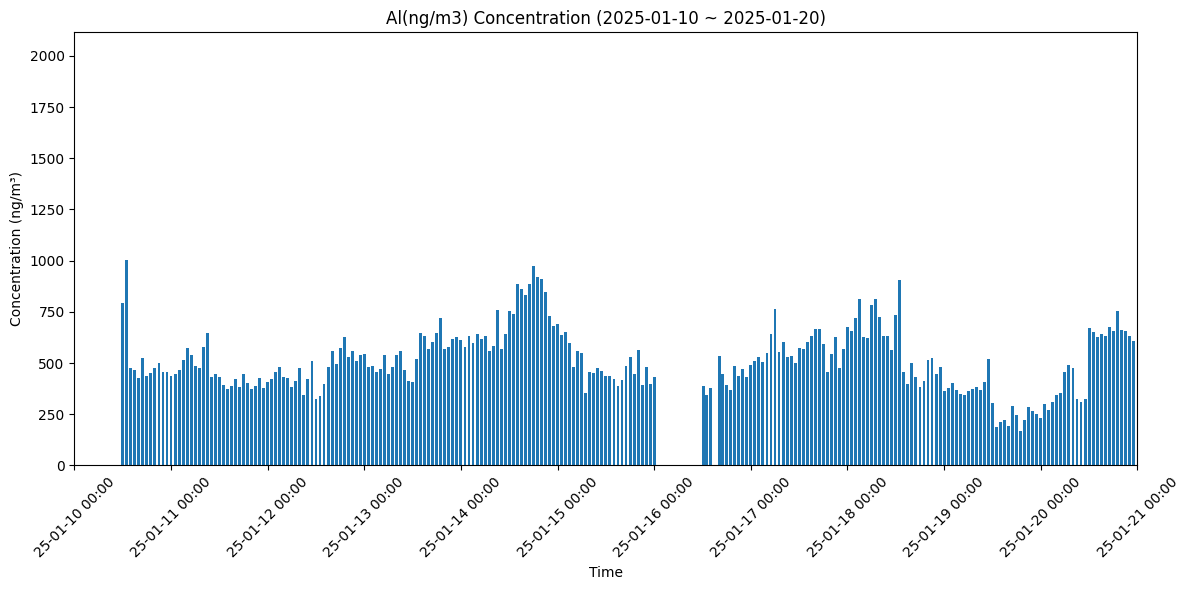

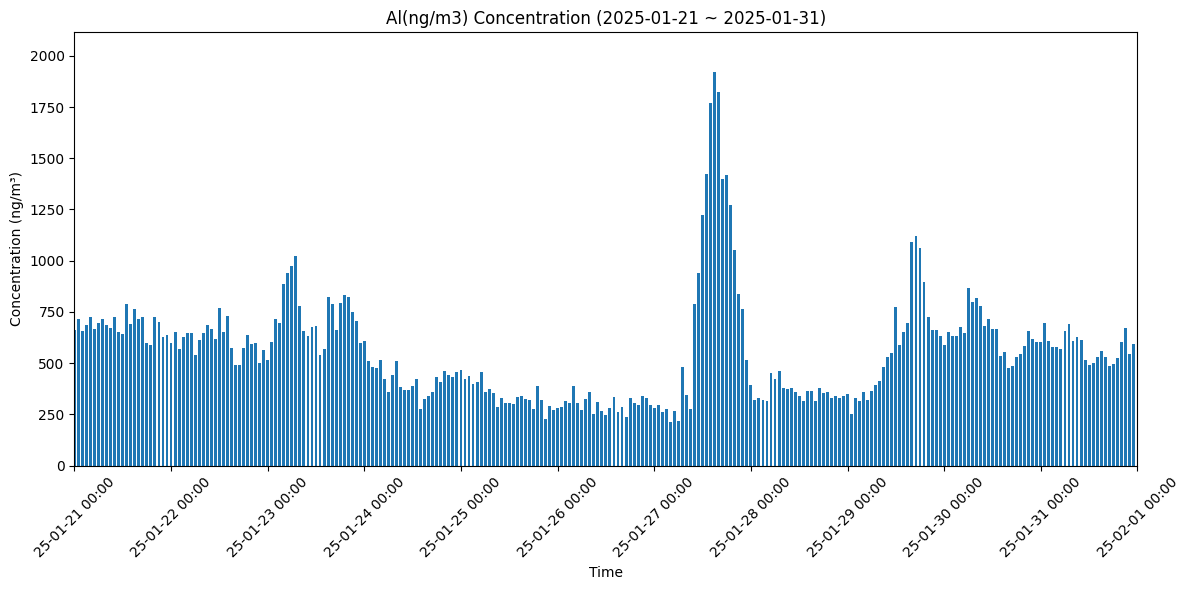

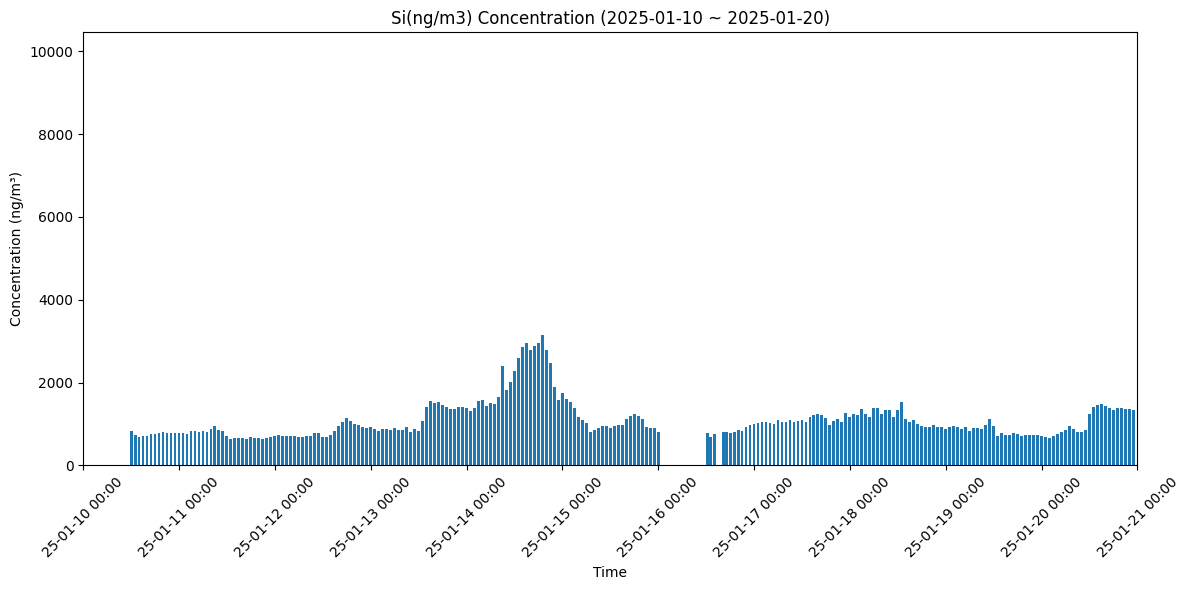

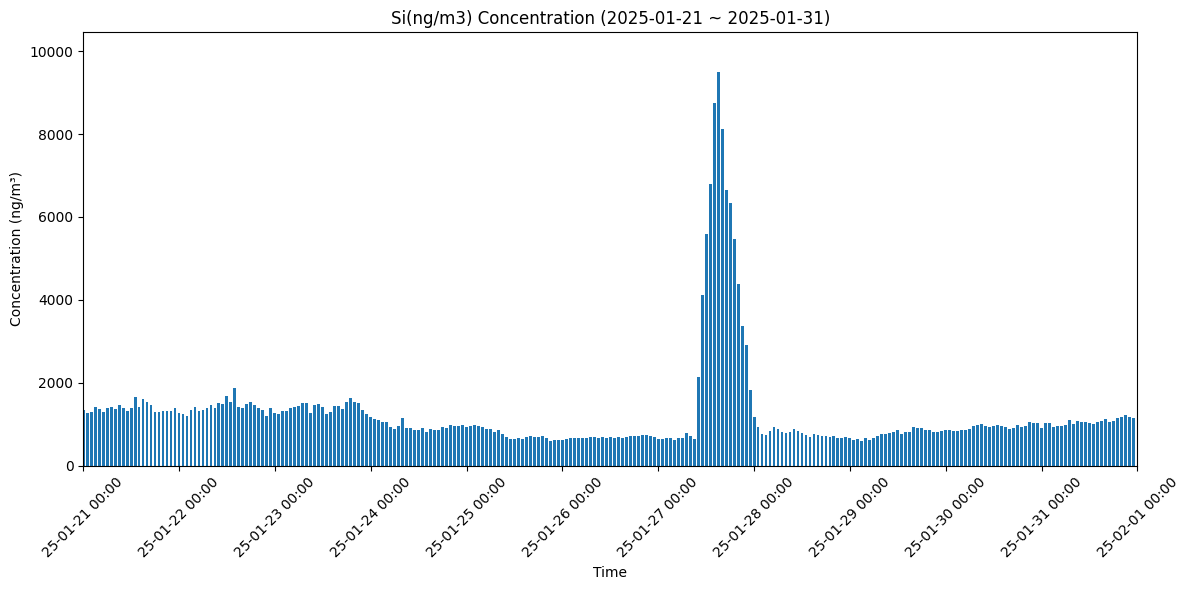

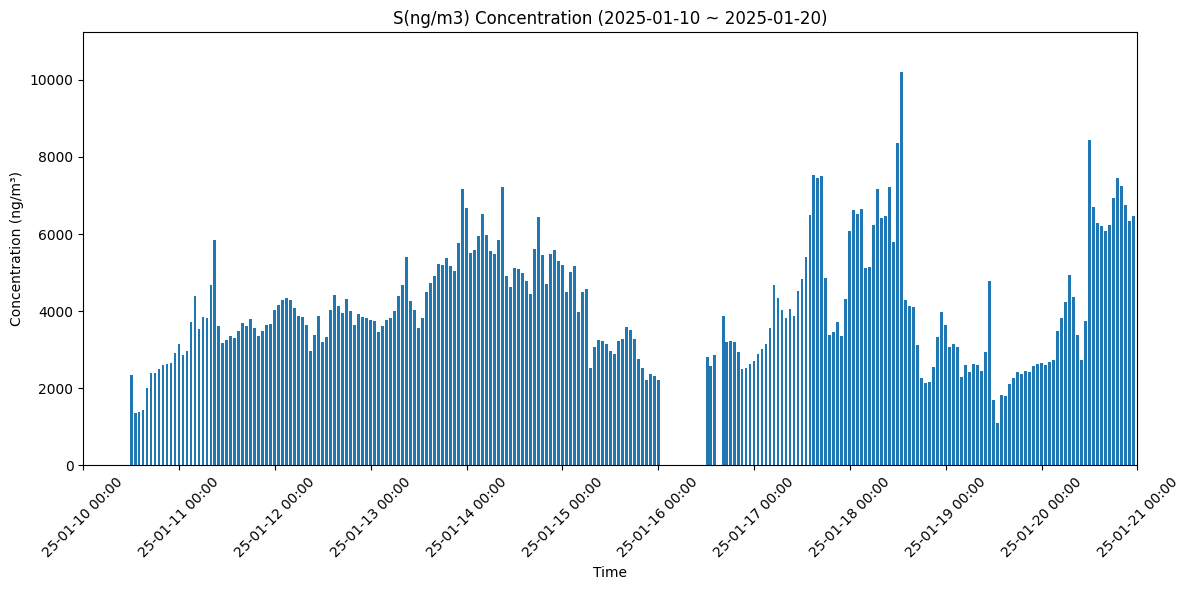

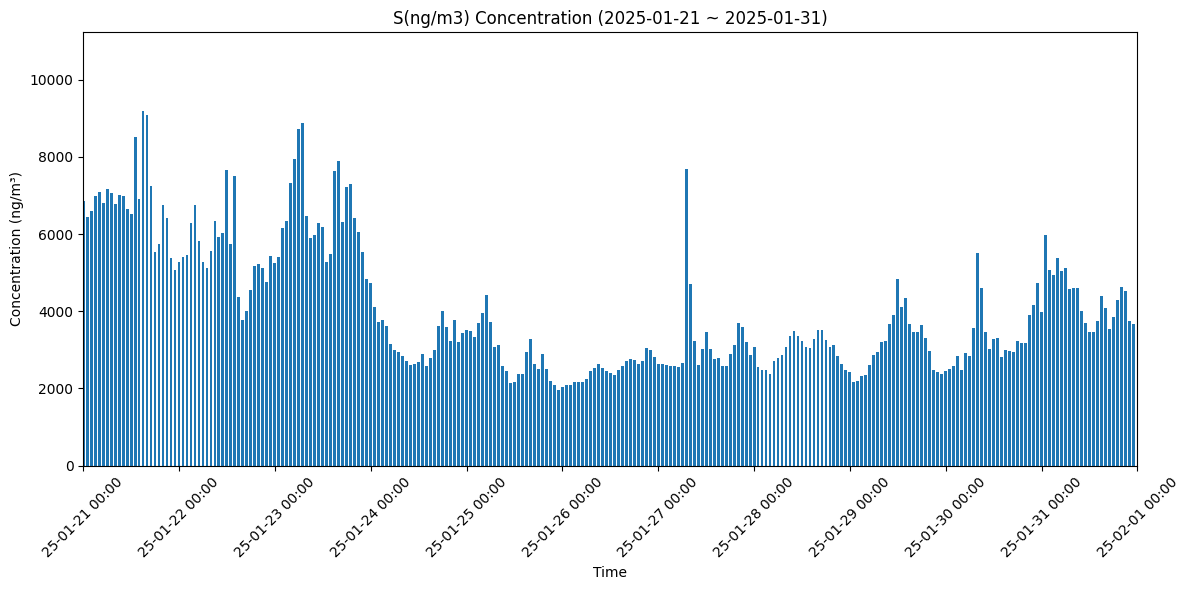

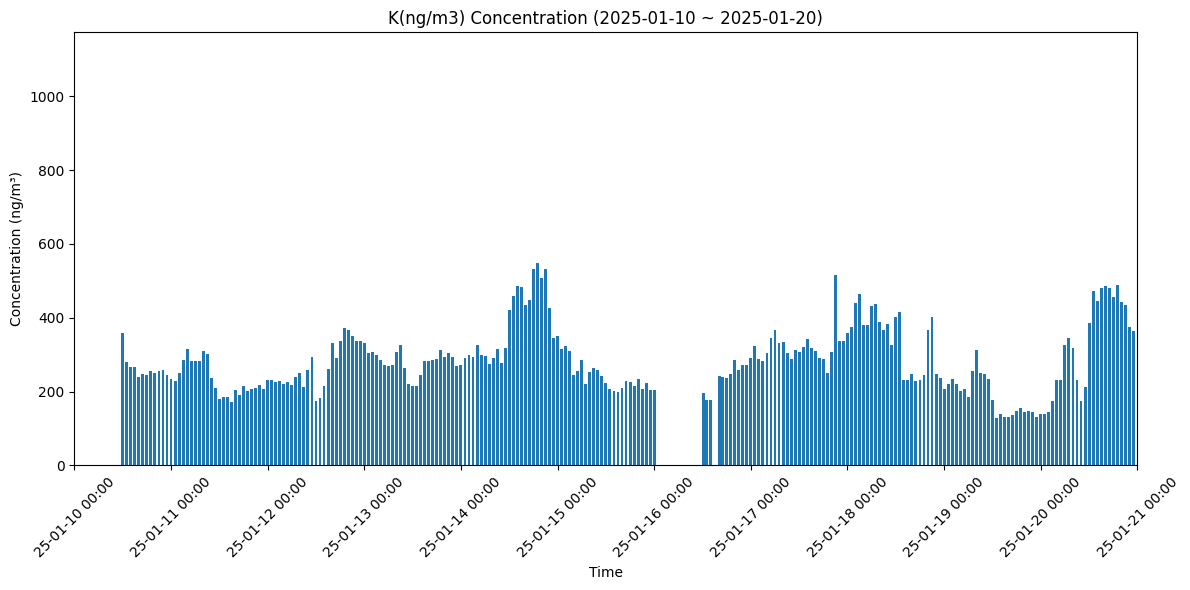

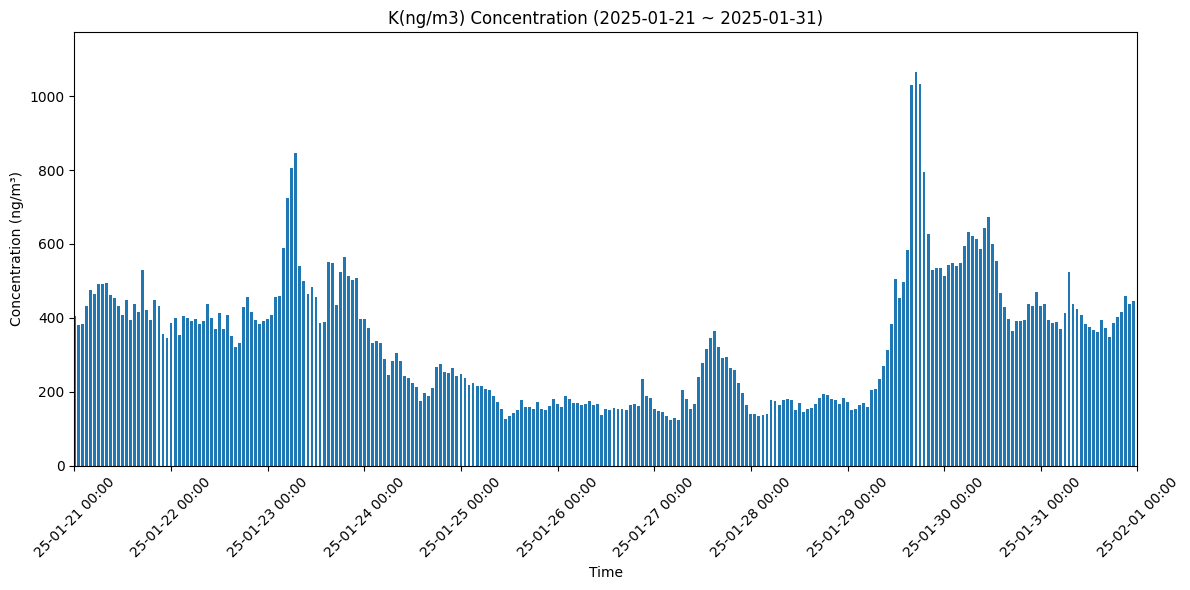

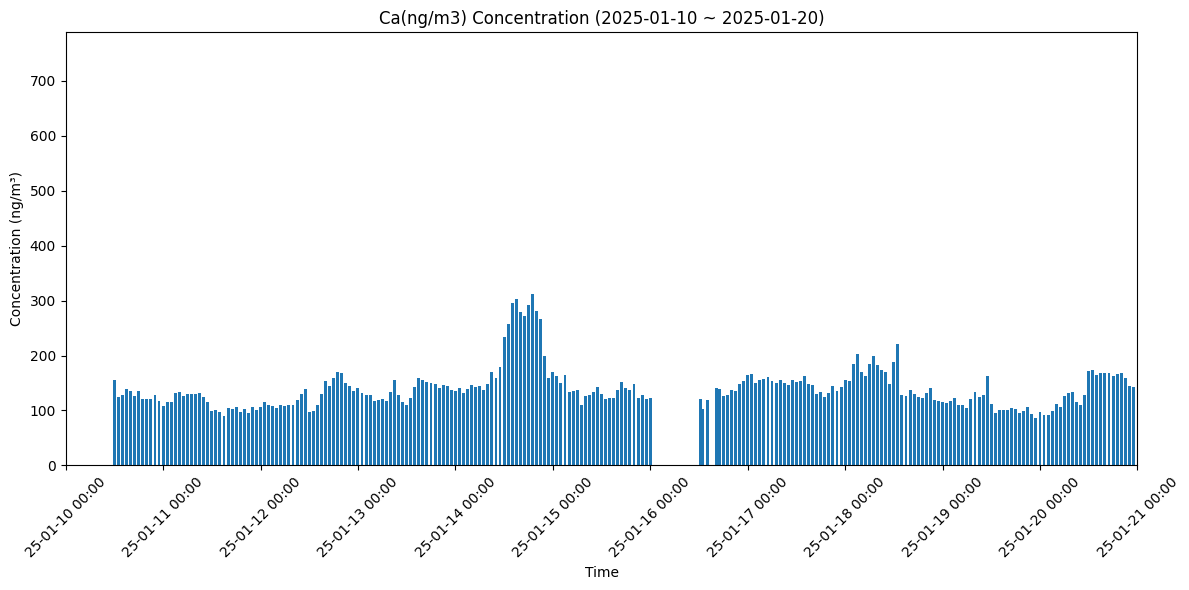

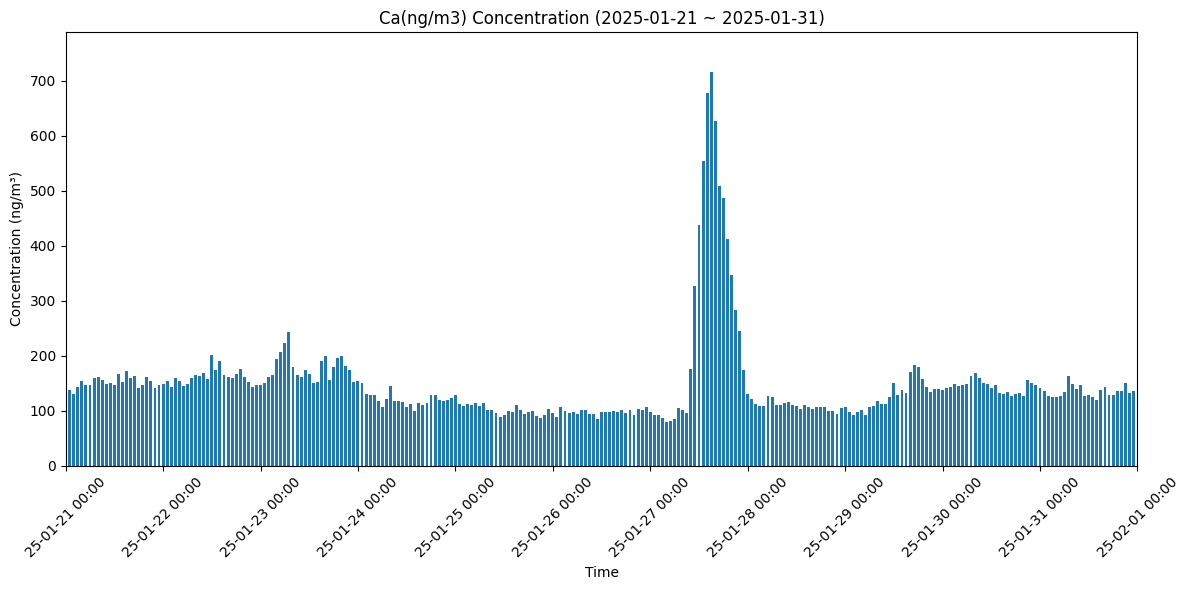

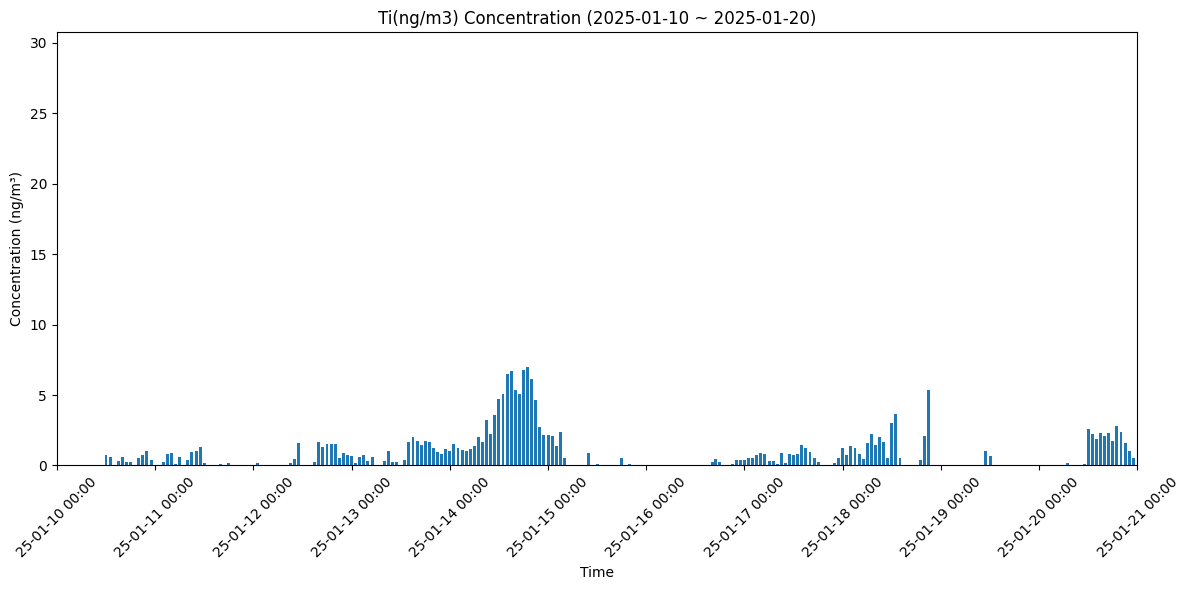

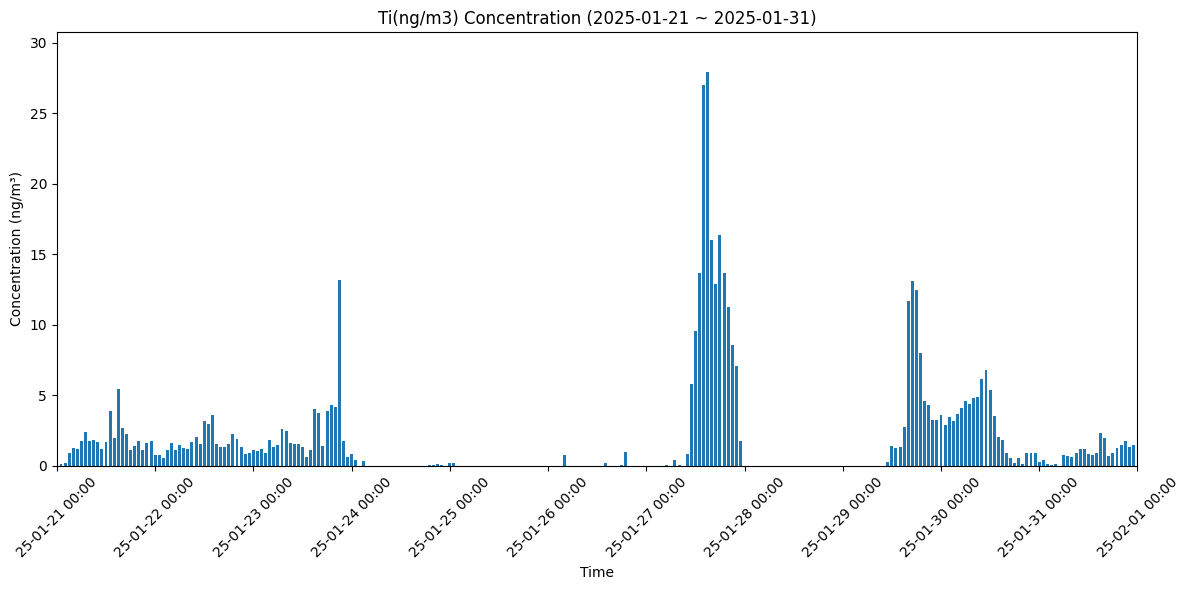

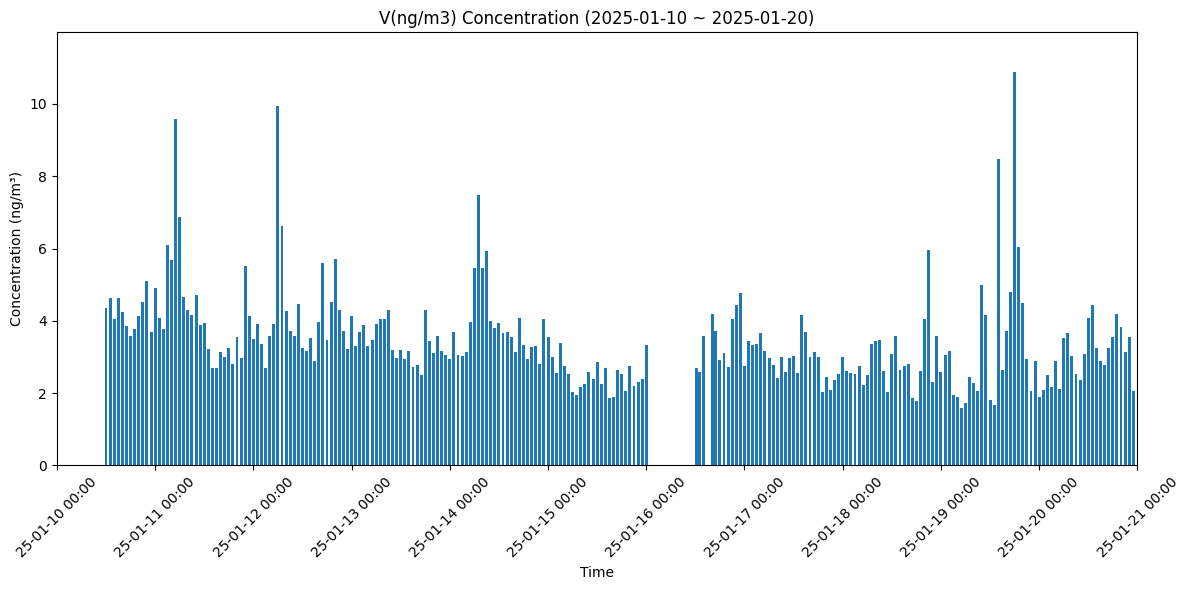

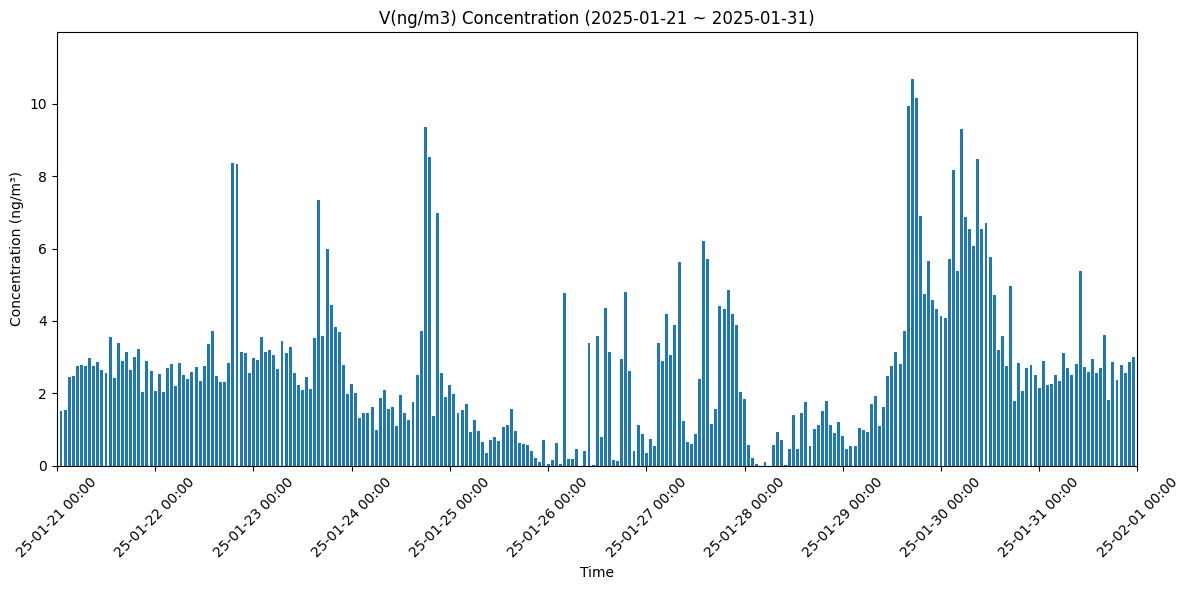

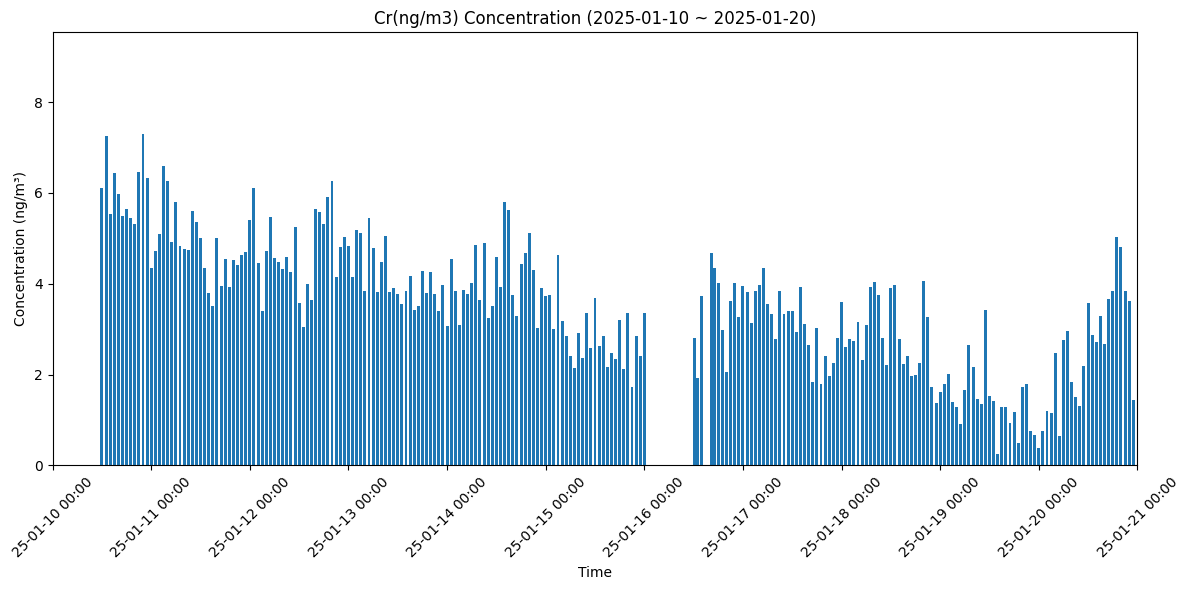

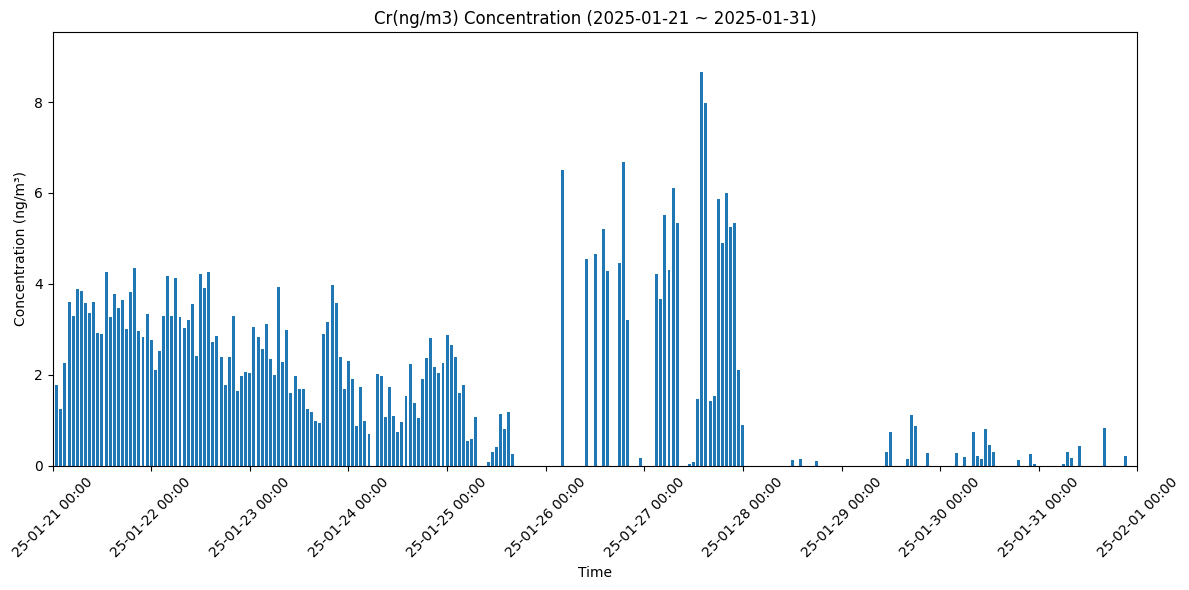

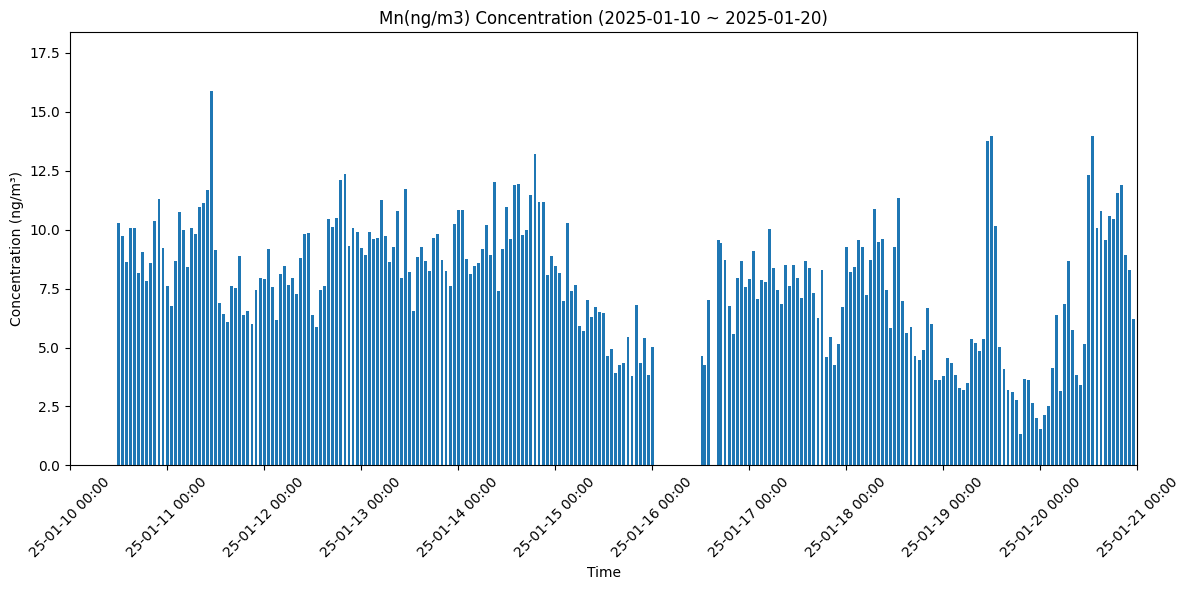

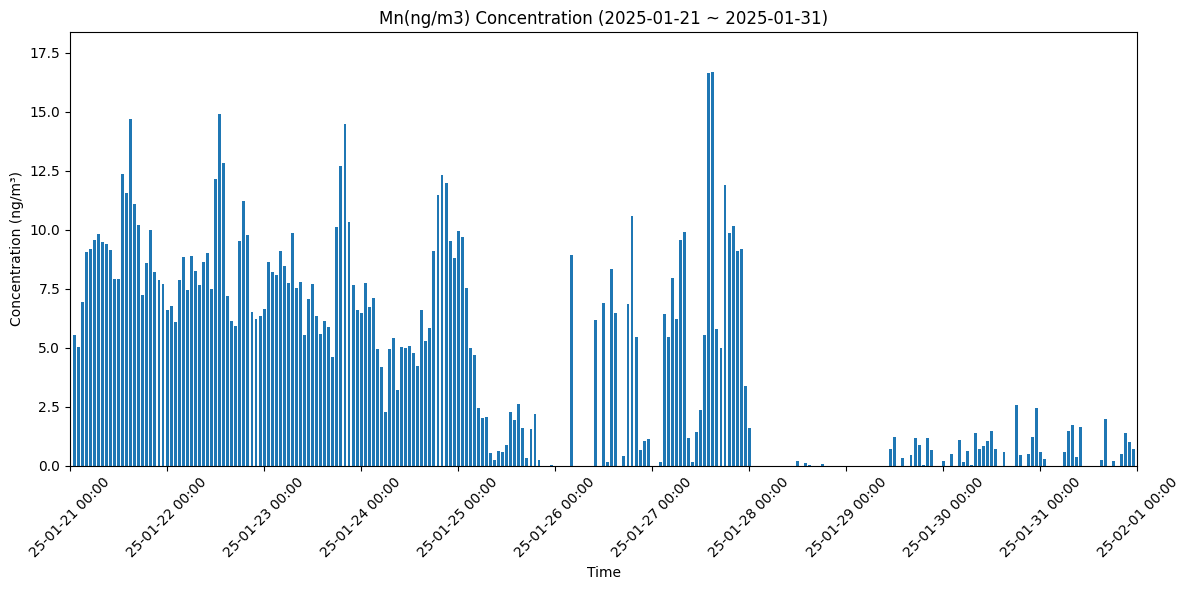

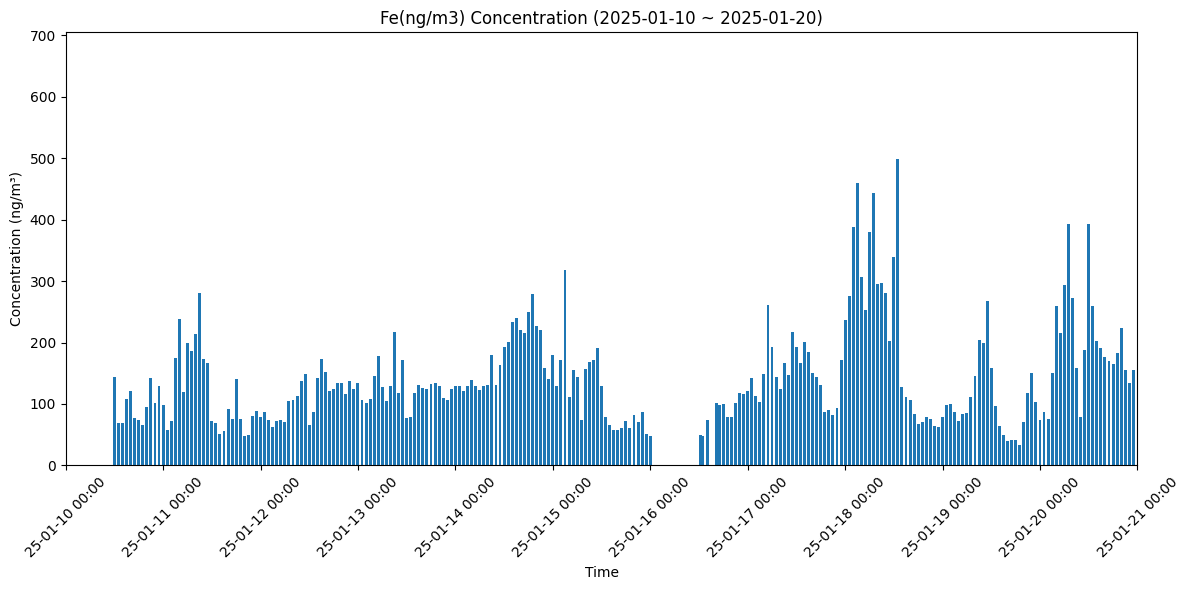

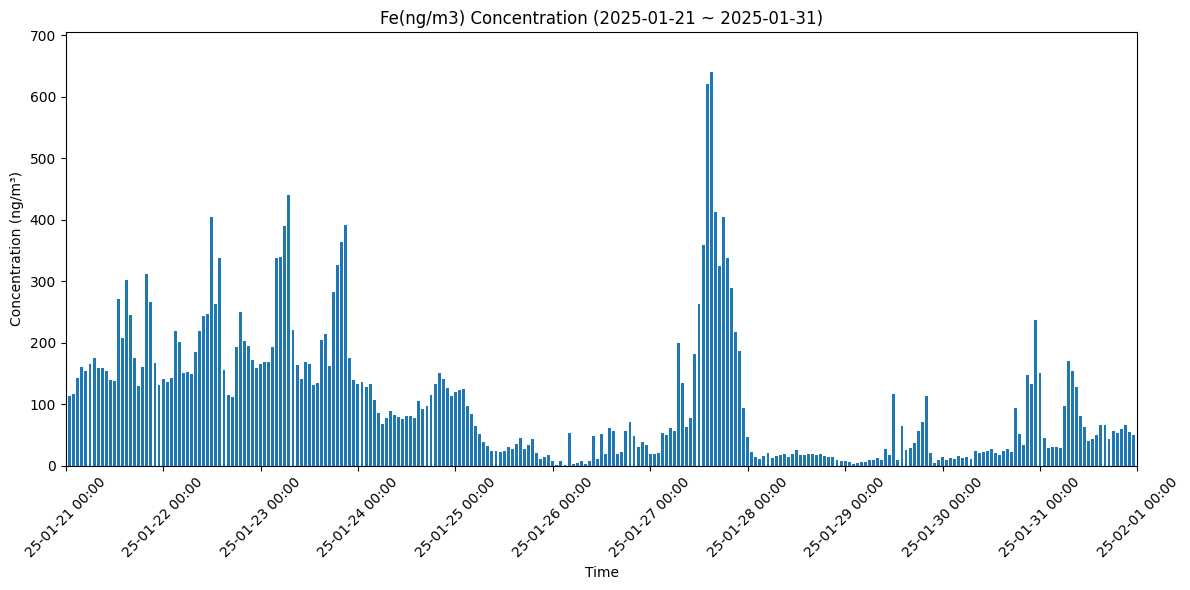

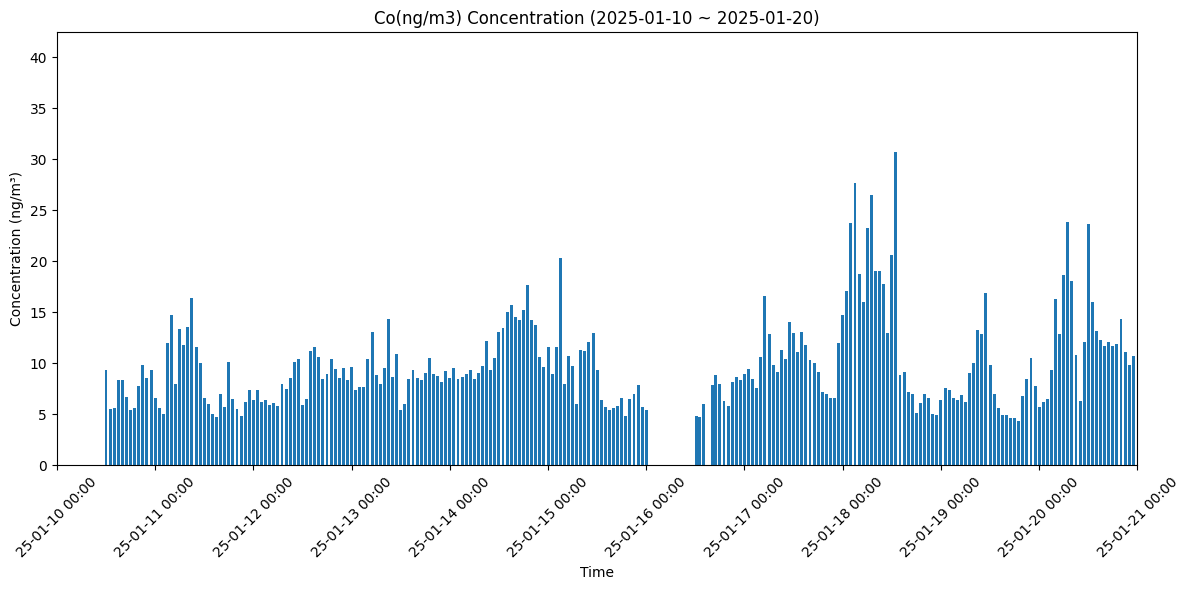

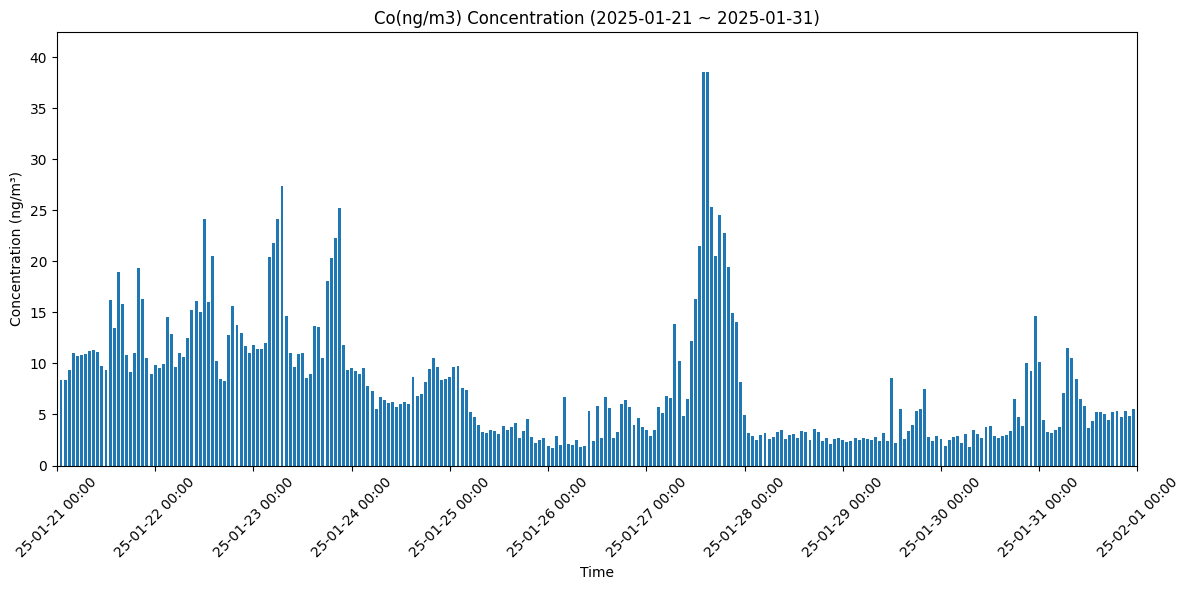

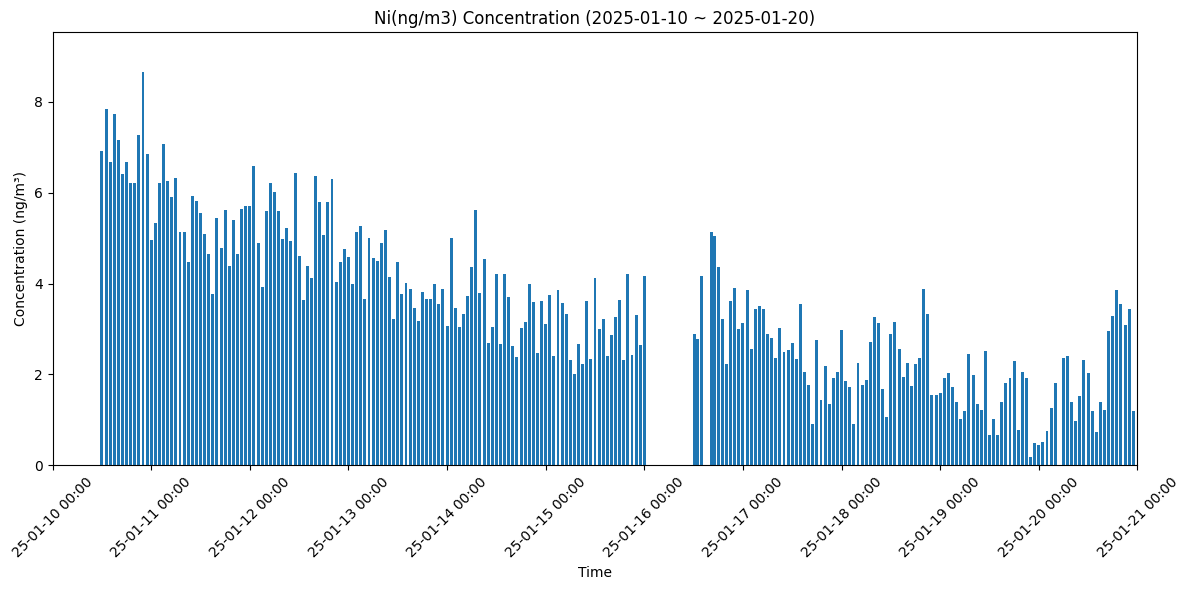

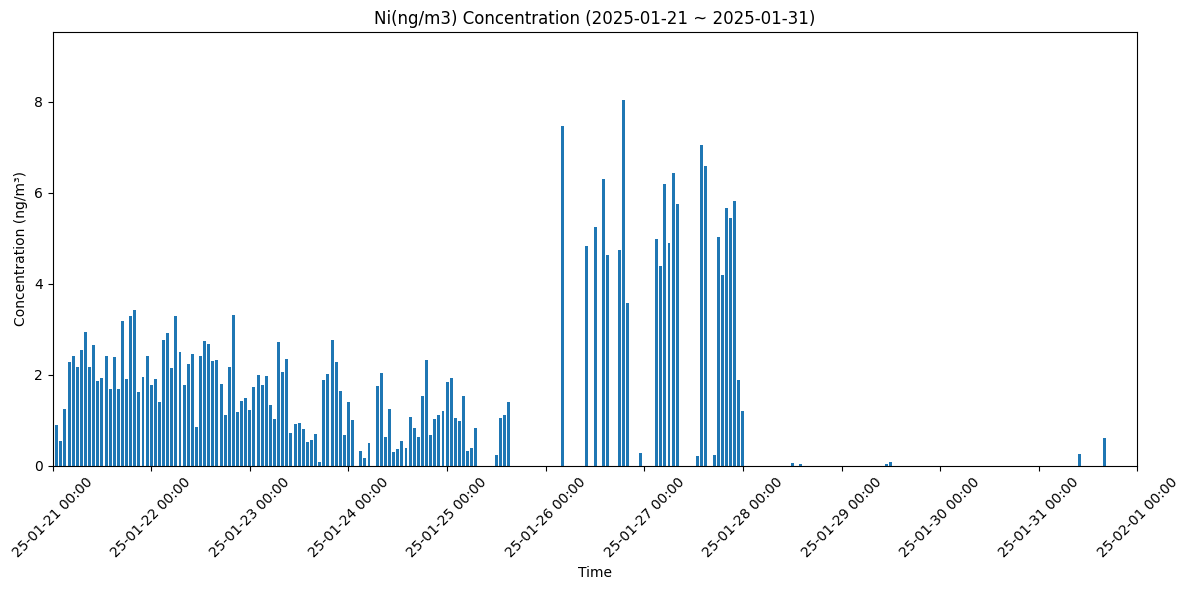

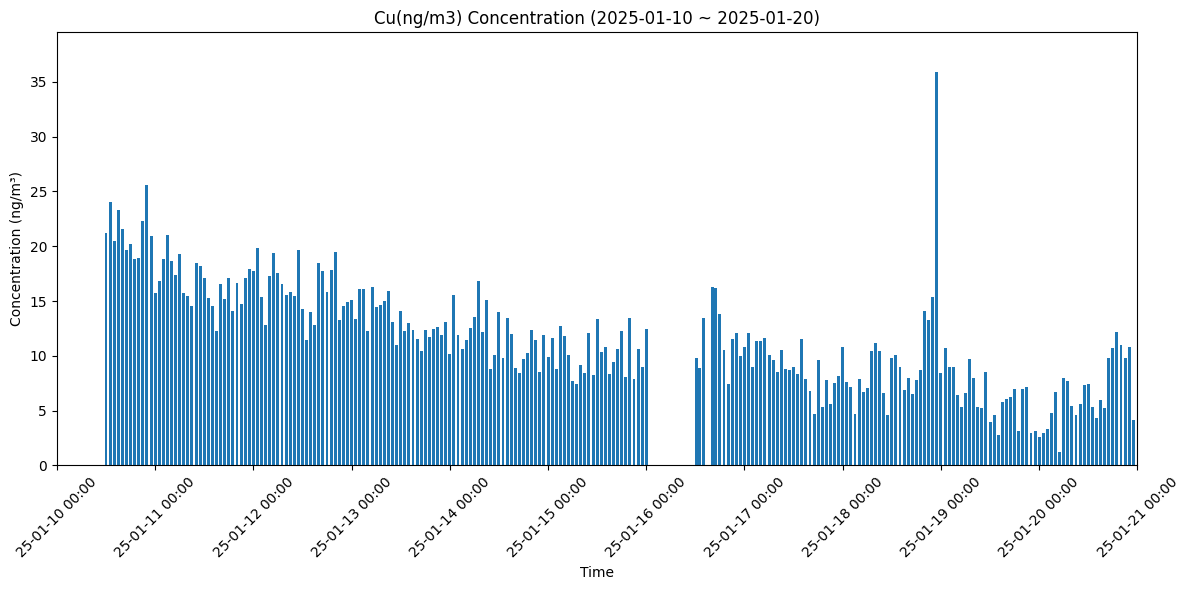

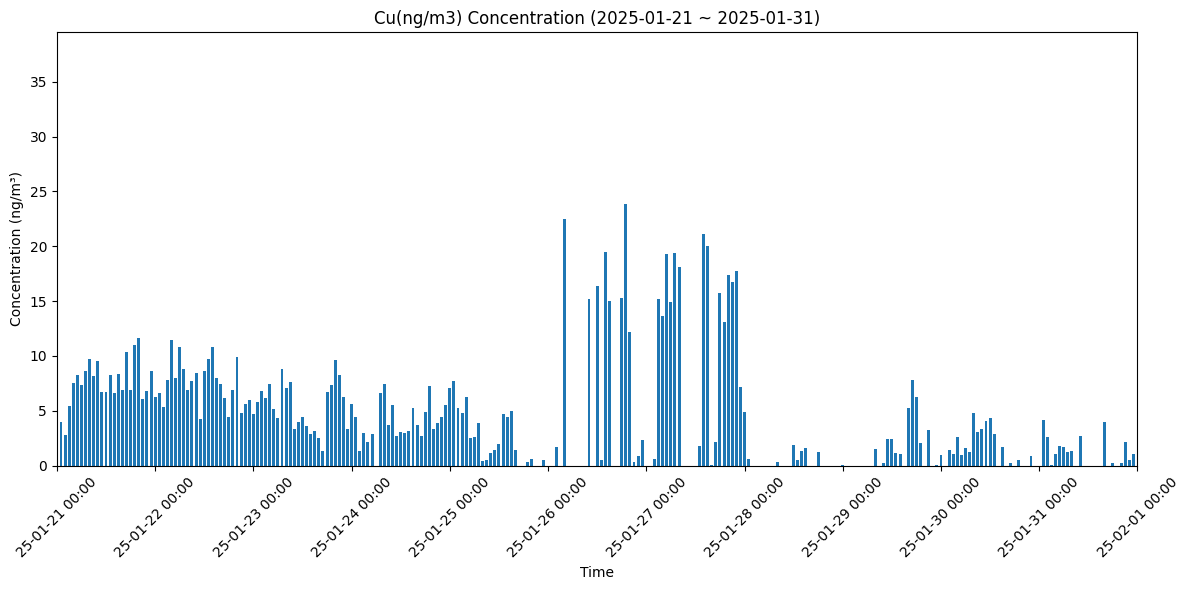

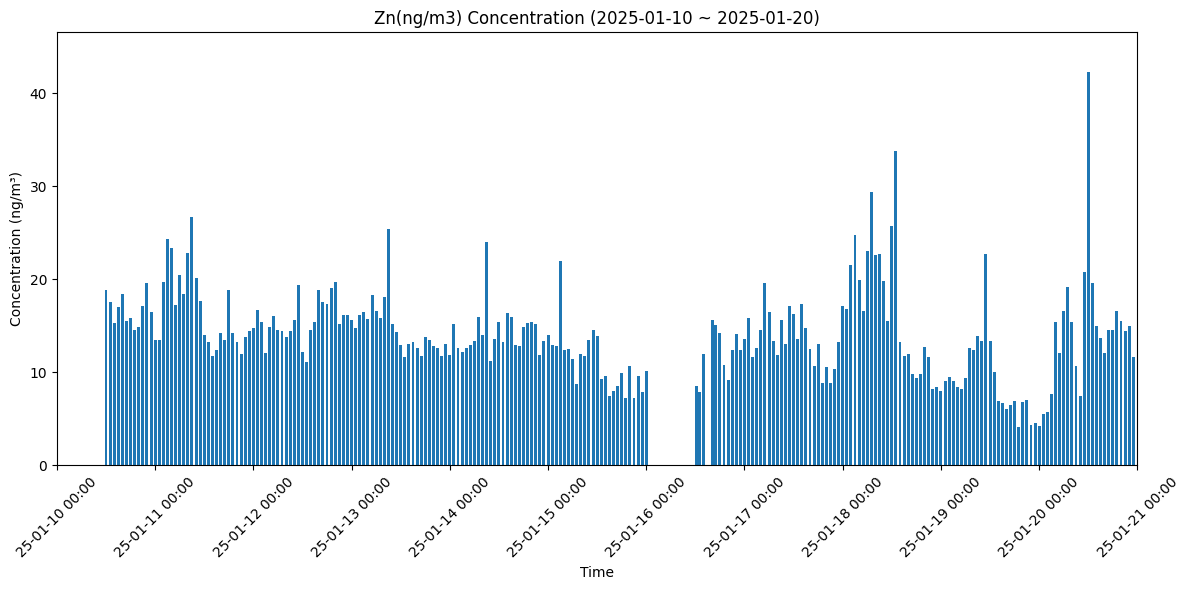

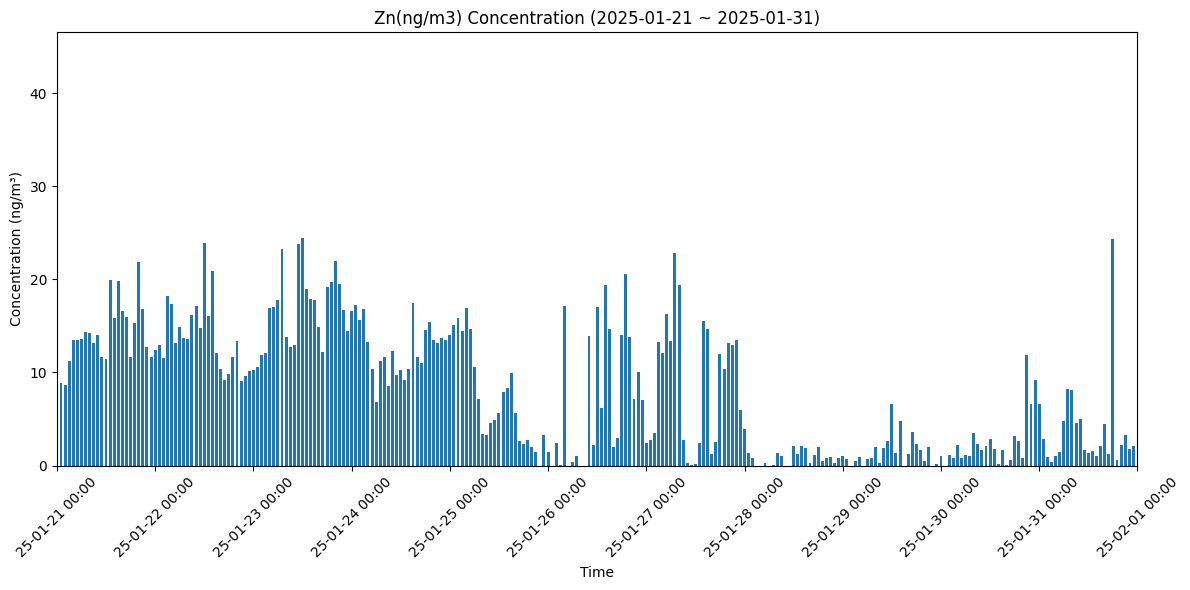

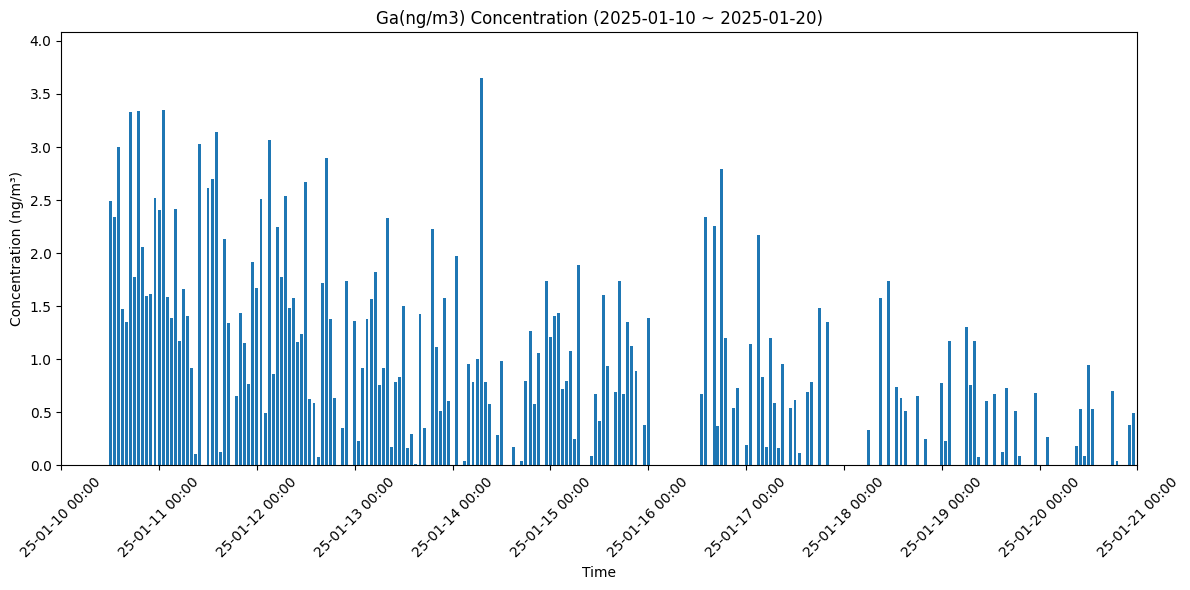

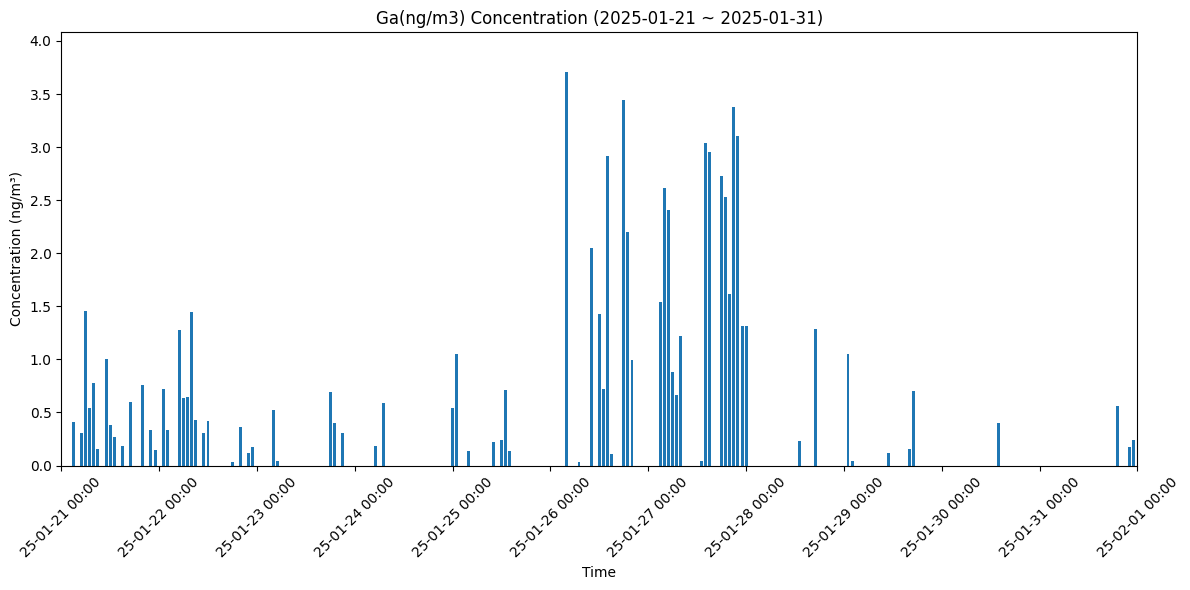

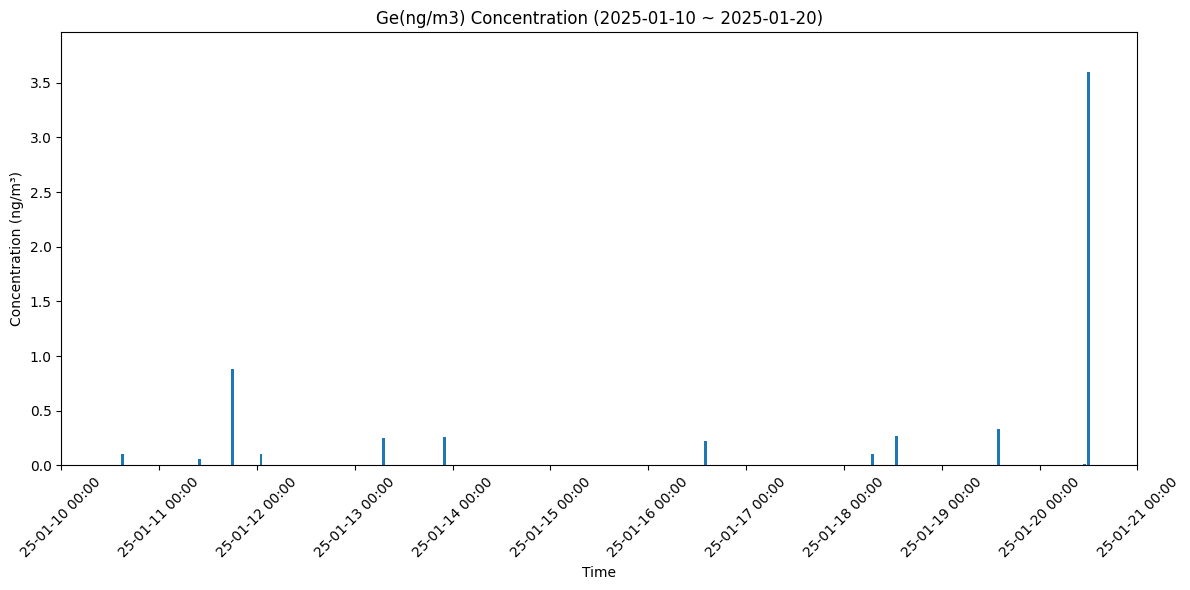

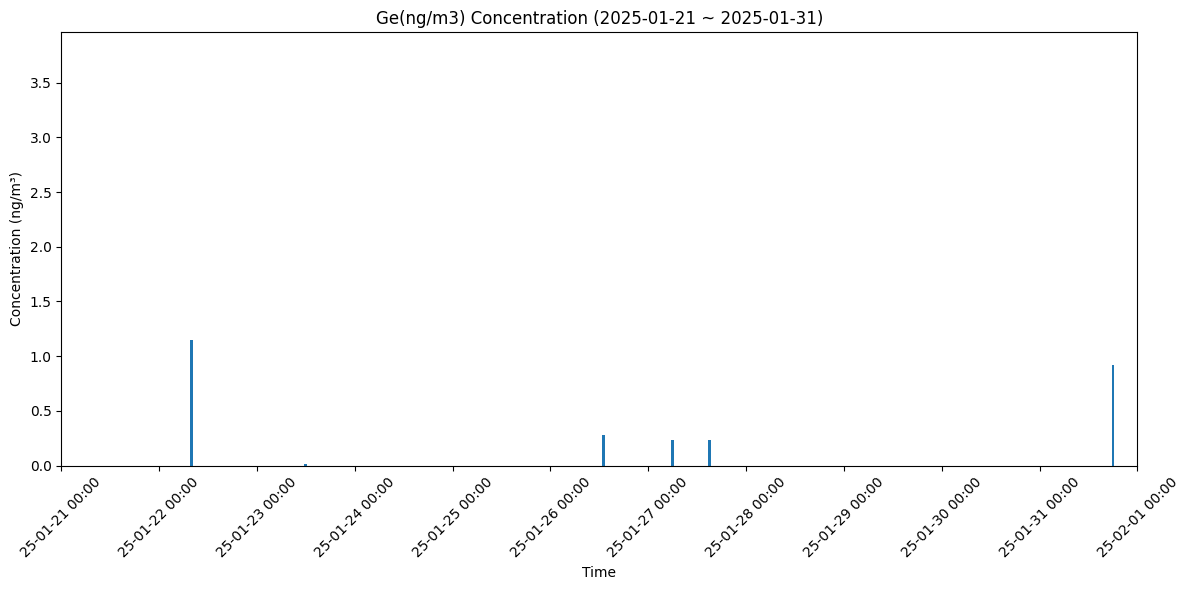

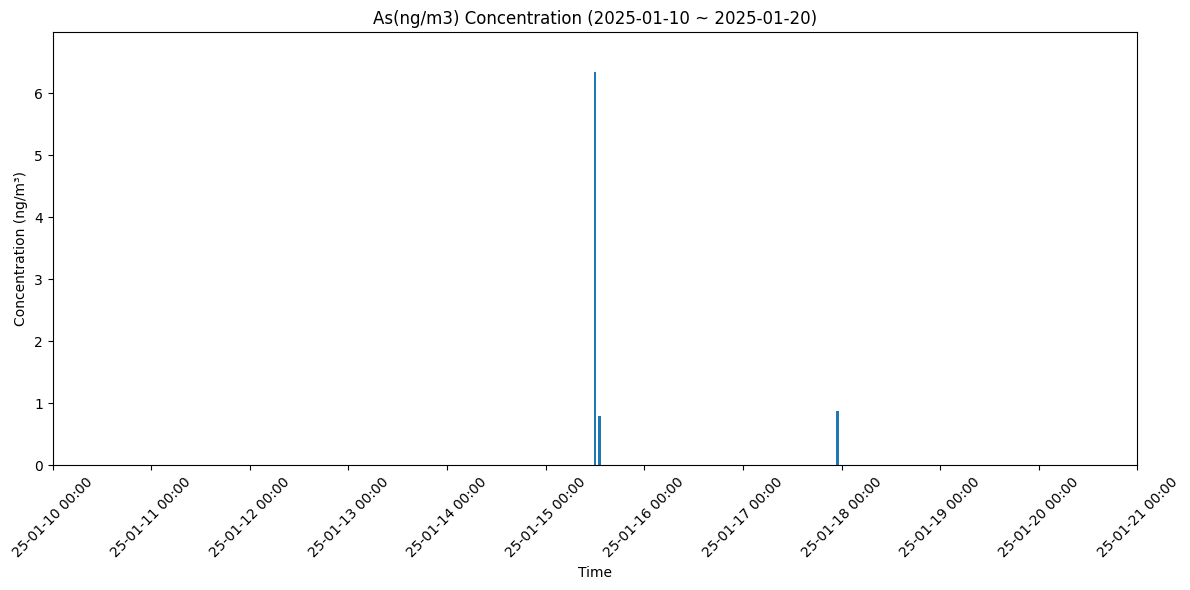

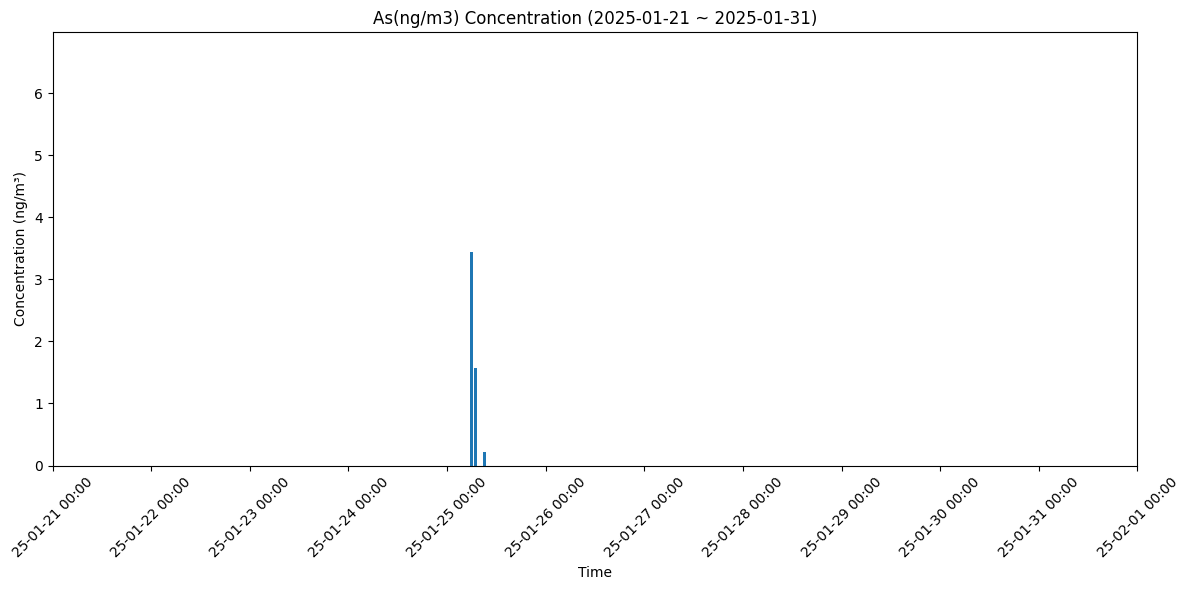

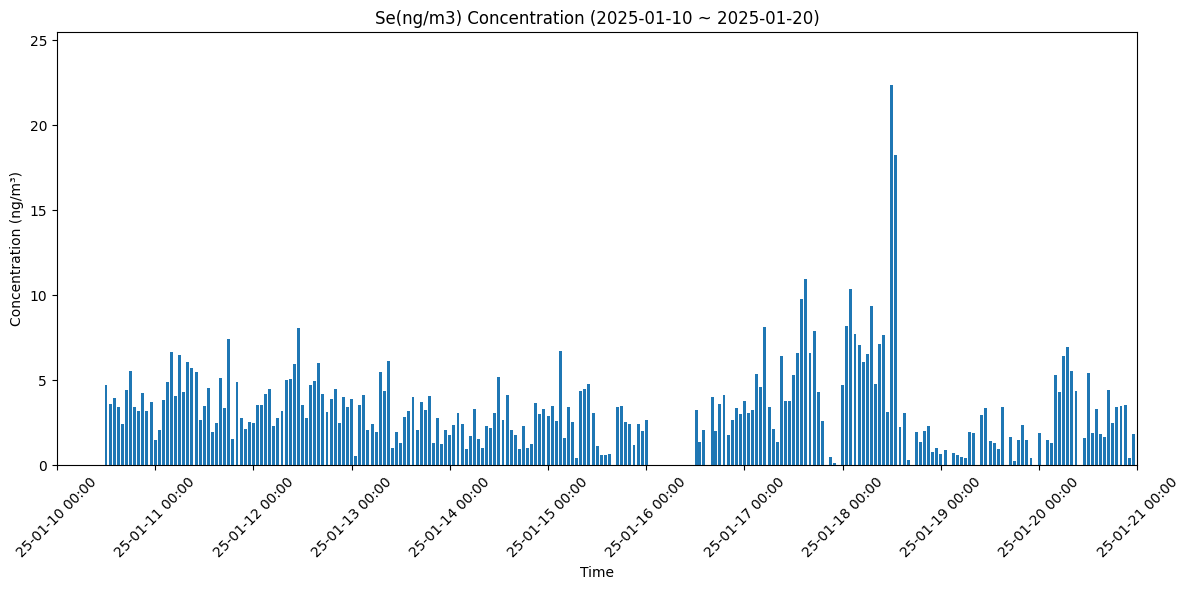

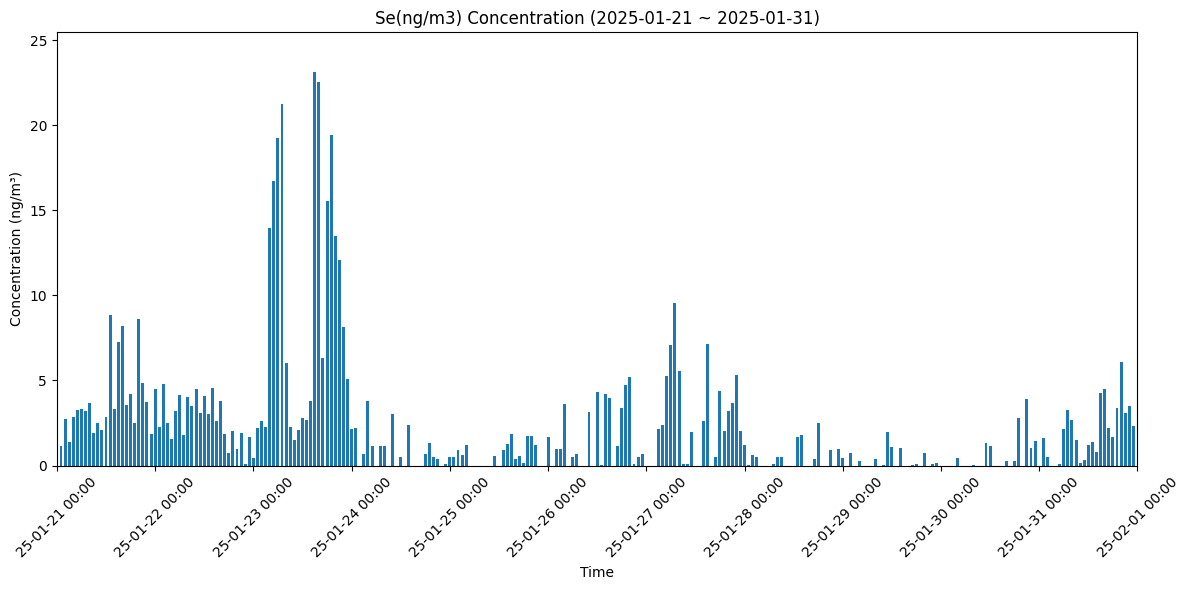

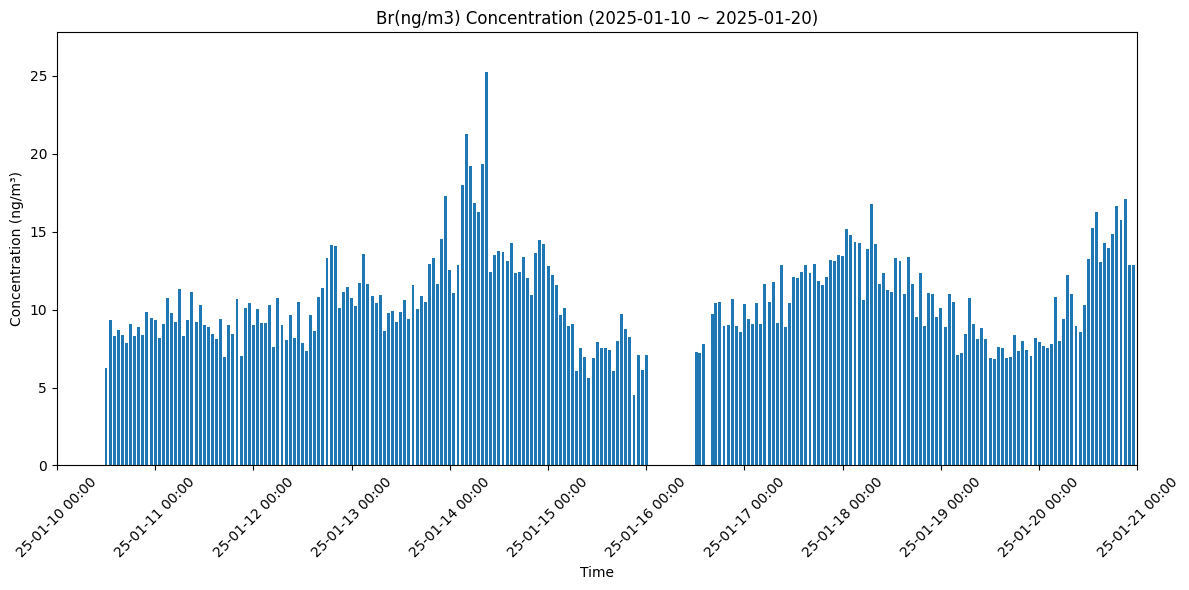

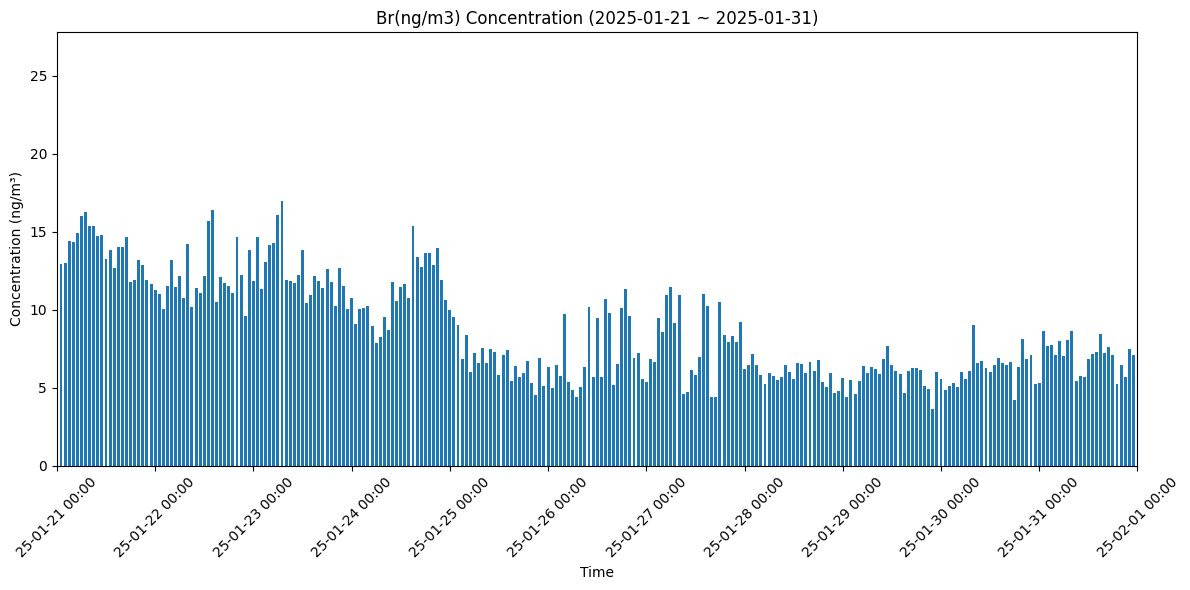

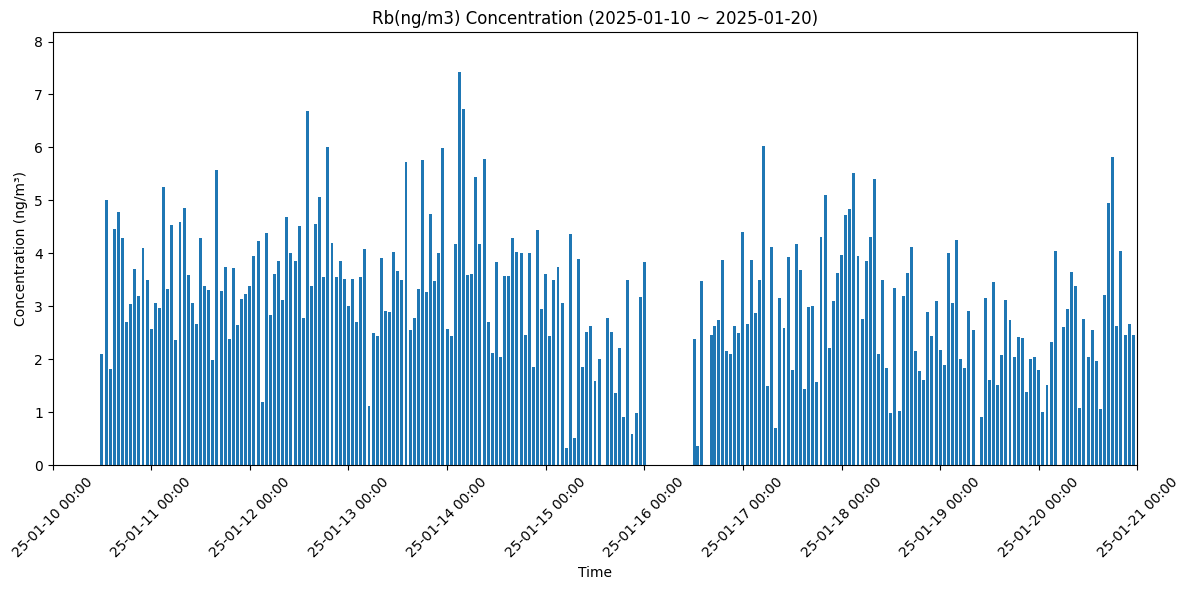

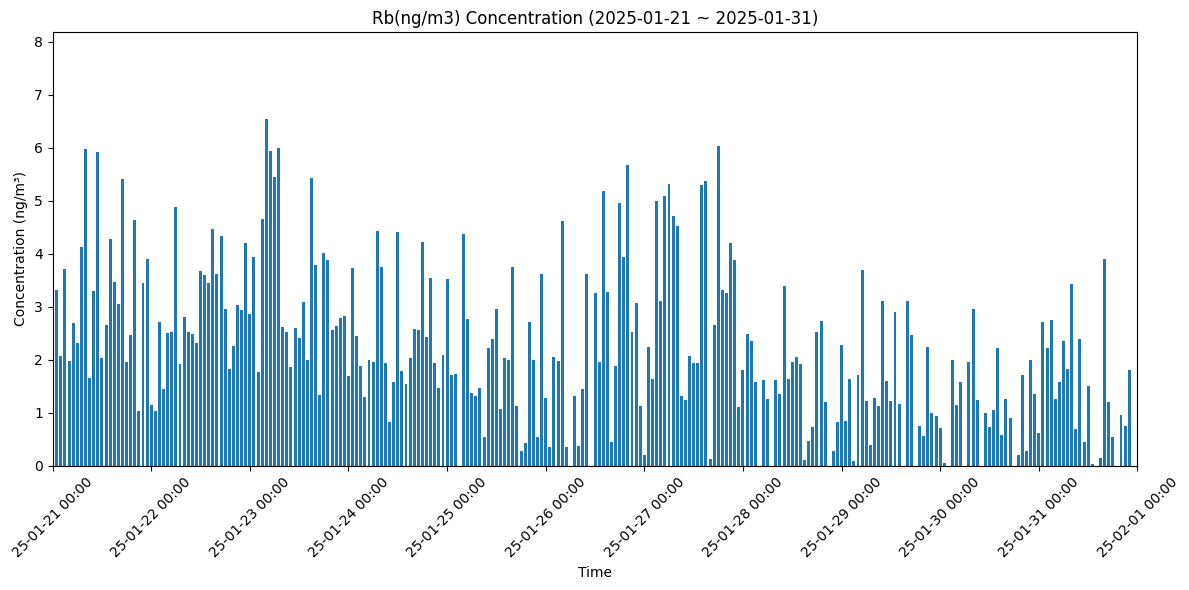

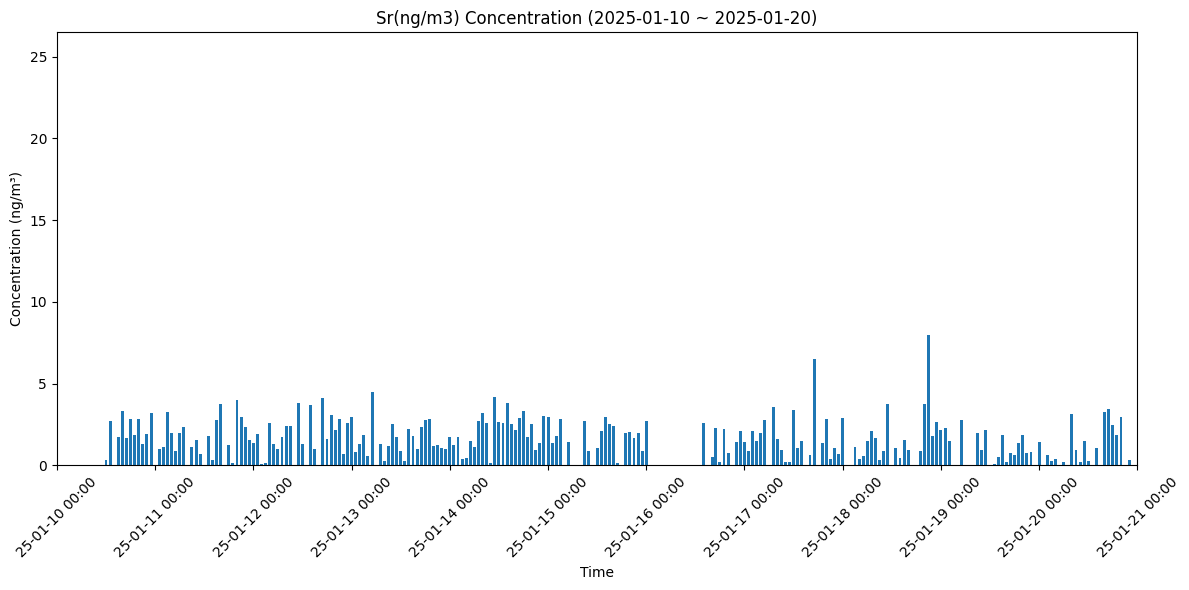

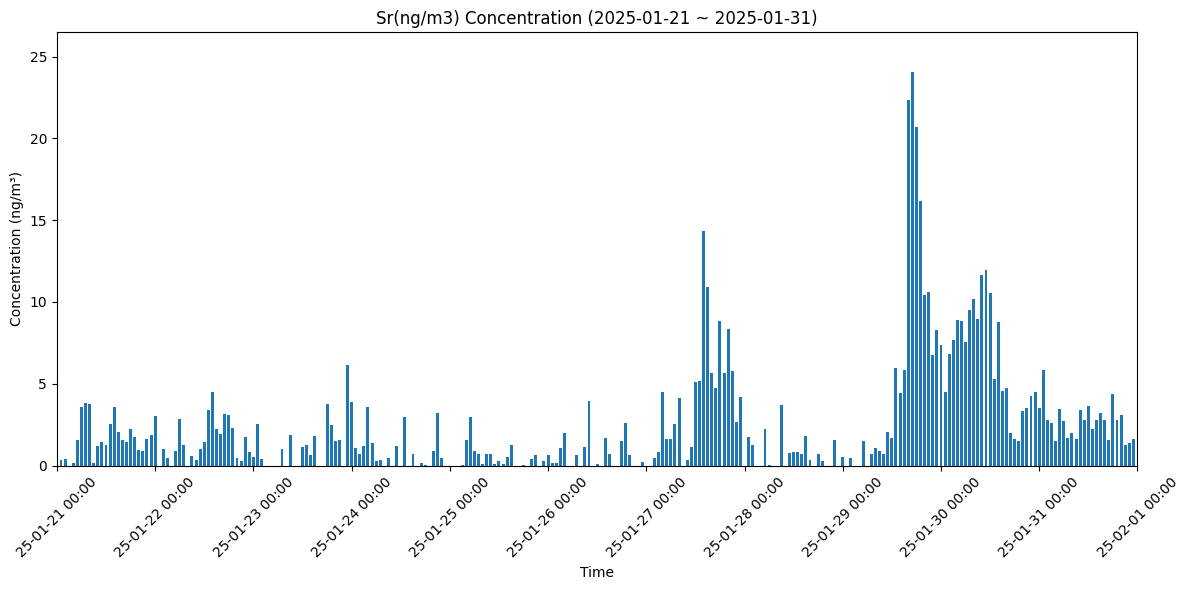

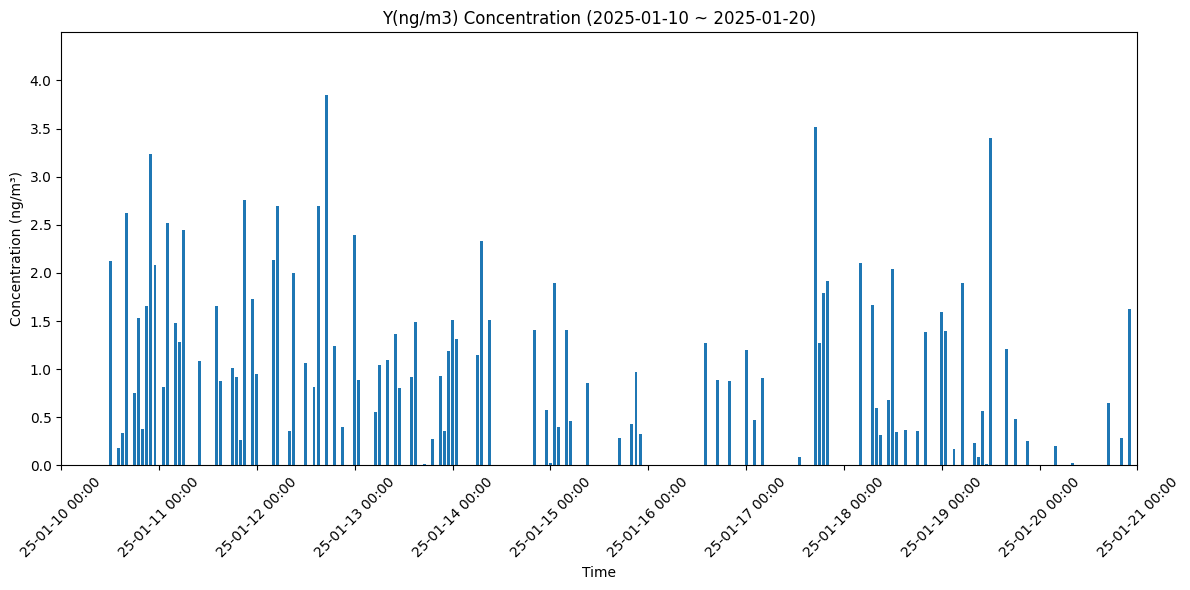

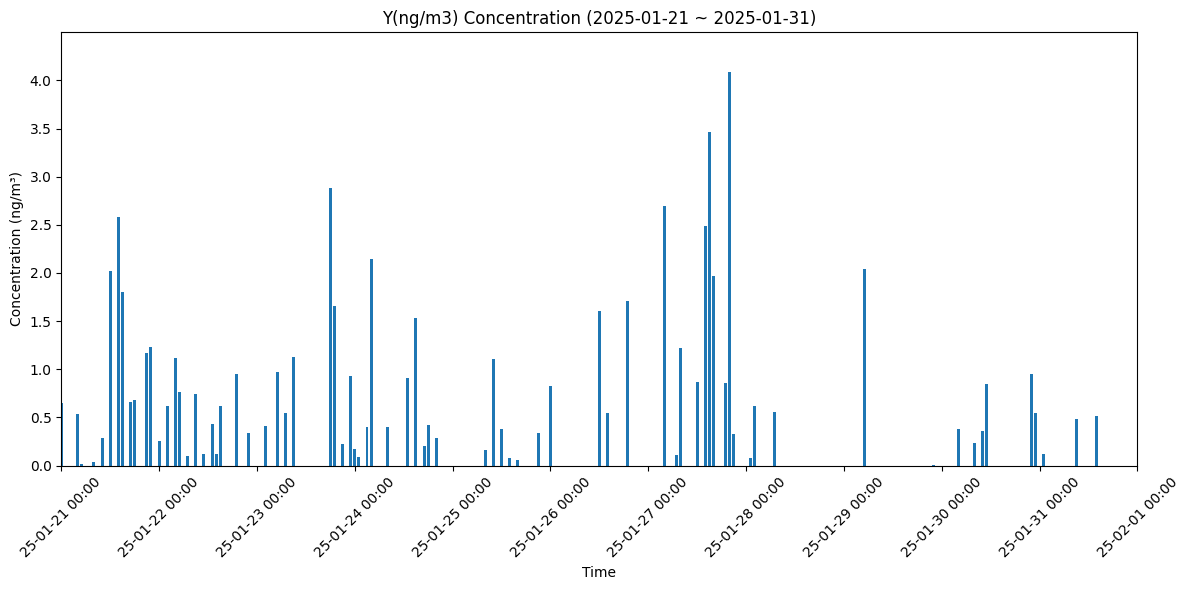

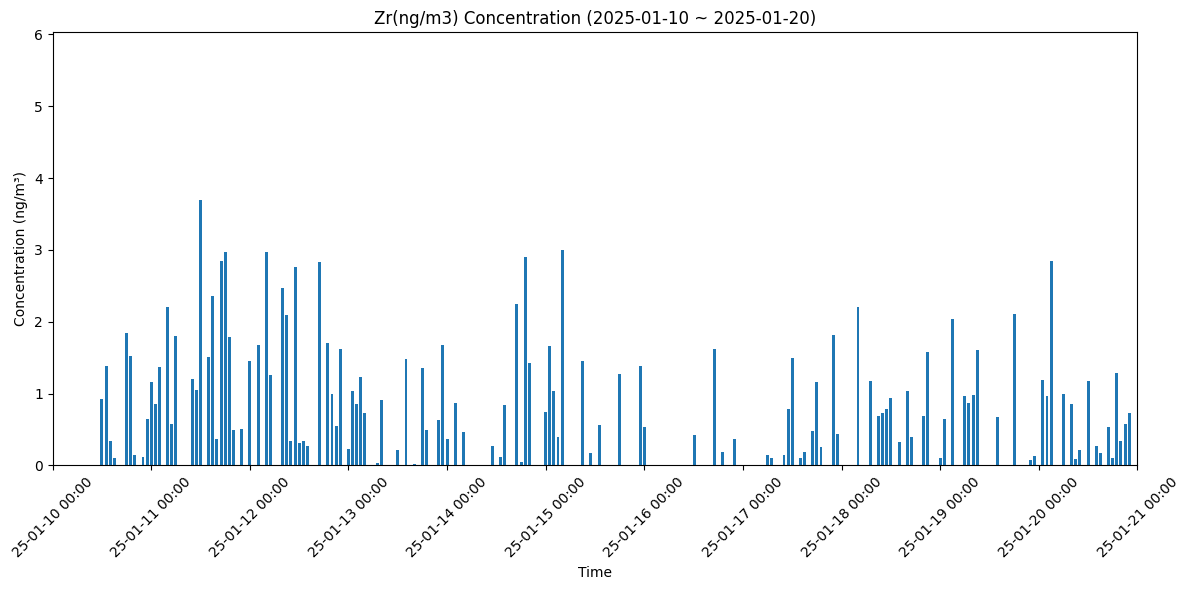

In [ ]:
# 개별 금속 막대그래프 생성 (11일 단위)
for metal in metal_columns:
    metal_ymax = df[df[metal].notna()][metal].max()
    metal_ymax = metal_ymax * 1.1

    for idx, date_group in enumerate(chunks, start=1):
        start_date = pd.to_datetime(min(date_group))
        end_date = pd.to_datetime(max(date_group)) + pd.Timedelta(days=1)

        temp_df = df[df['Date'].isin(pd.to_datetime(date_group).date)]
        temp_df = temp_df[(temp_df['Pump-Begin'] >= start_date) & (temp_df['Pump-Begin'] < end_date)]

        # 막대그래프 그리기
        plt.figure(figsize=(12, 6))
        plt.bar(temp_df['Pump-Begin'], temp_df[metal], width=0.03)

        # 그래프 기본 설정
        plt.title(f'{metal} Concentration ({date_group[0]} ~ {date_group[-1]})')
        plt.xlabel('Time')
        plt.ylabel('Concentration (ng/m³)')

        # X축 설정 : 가독성 위해 하루 단위로 표시, 데이터는 1시간 단위
        plt.xlim(start_date, end_date)
        plt.ylim(0, metal_ymax)
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
        plt.xticks(rotation=45)

        # 그래프 출력
        plt.tight_layout()
        plt.show()